# CARDIOVASCULAR PREDICTION

The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).

In [0]:
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_palette("pastel")

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [1]:
from sklearn.preprocessing import LabelEncoder

# models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn import tree

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix #for model evaluation
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(123) #ensure reproducibility
random_state=123

## Import Data

In [2]:
df = pd.read_csv("train.csv")
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [3]:
df.shape

(3390, 17)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [5]:
# Remove id column
df.drop(['id'],axis=1,inplace=True)

## Preprocessing
Handle missing data

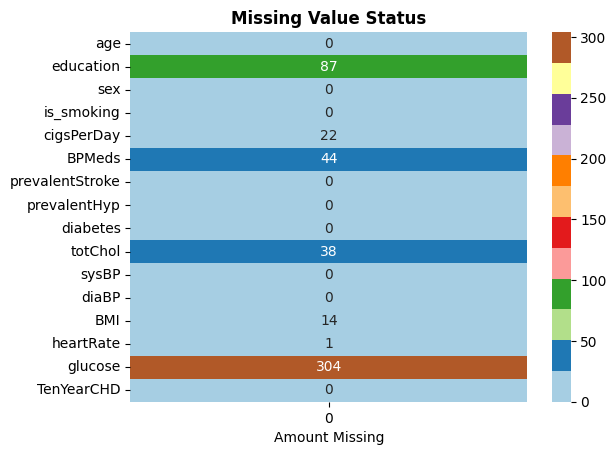

In [6]:
plt.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(df.isna().sum().to_frame(),annot=True,fmt='d',cmap='Paired')
ax.set_xlabel('Amount Missing')
plt.show()

In [7]:
# Before Altering the Data copying original data
df_original = df.copy()

In [8]:
df.describe(include='all')

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3303.000000,3390,3390,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
unique,NaN,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1923,1703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,49.542183,1.970936,NaN,NaN,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,8.592878,1.019081,NaN,NaN,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,32.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,49.000000,2.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,56.000000,3.000000,NaN,NaN,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000


In [9]:
df.groupby('education').size()

education
1.0    1391
2.0     990
3.0     549
4.0     373
dtype: int64

In [10]:
# Filling the missing values for nominal variables with MODE
df['education'] = df['education'].fillna((df['education'].mode()[0]))
df['BPMeds'] = df['BPMeds'].fillna((df['BPMeds'].mode()[0]))

# Filling the missing values for continuous variables with MEDIAN
df['glucose'] = df['glucose'].fillna((df['glucose'].mean()))
df['heartRate'] = df['heartRate'].fillna((df['heartRate'].mean()))
df['BMI'] = df['BMI'].fillna((df['BMI'].mean()))
df['cigsPerDay'] = df['cigsPerDay'].fillna((df['cigsPerDay'].mean()))
df['totChol'] = df['totChol'].fillna((df['totChol'].mean()))

Normalisation

In [11]:
labelencoder = LabelEncoder()
# Assigning numerical values for categorical variables
df['sex'] = labelencoder.fit_transform(df['sex'])
df['is_smoking'] = labelencoder.fit_transform(df['is_smoking'])

## EDA


Checking correlation between features

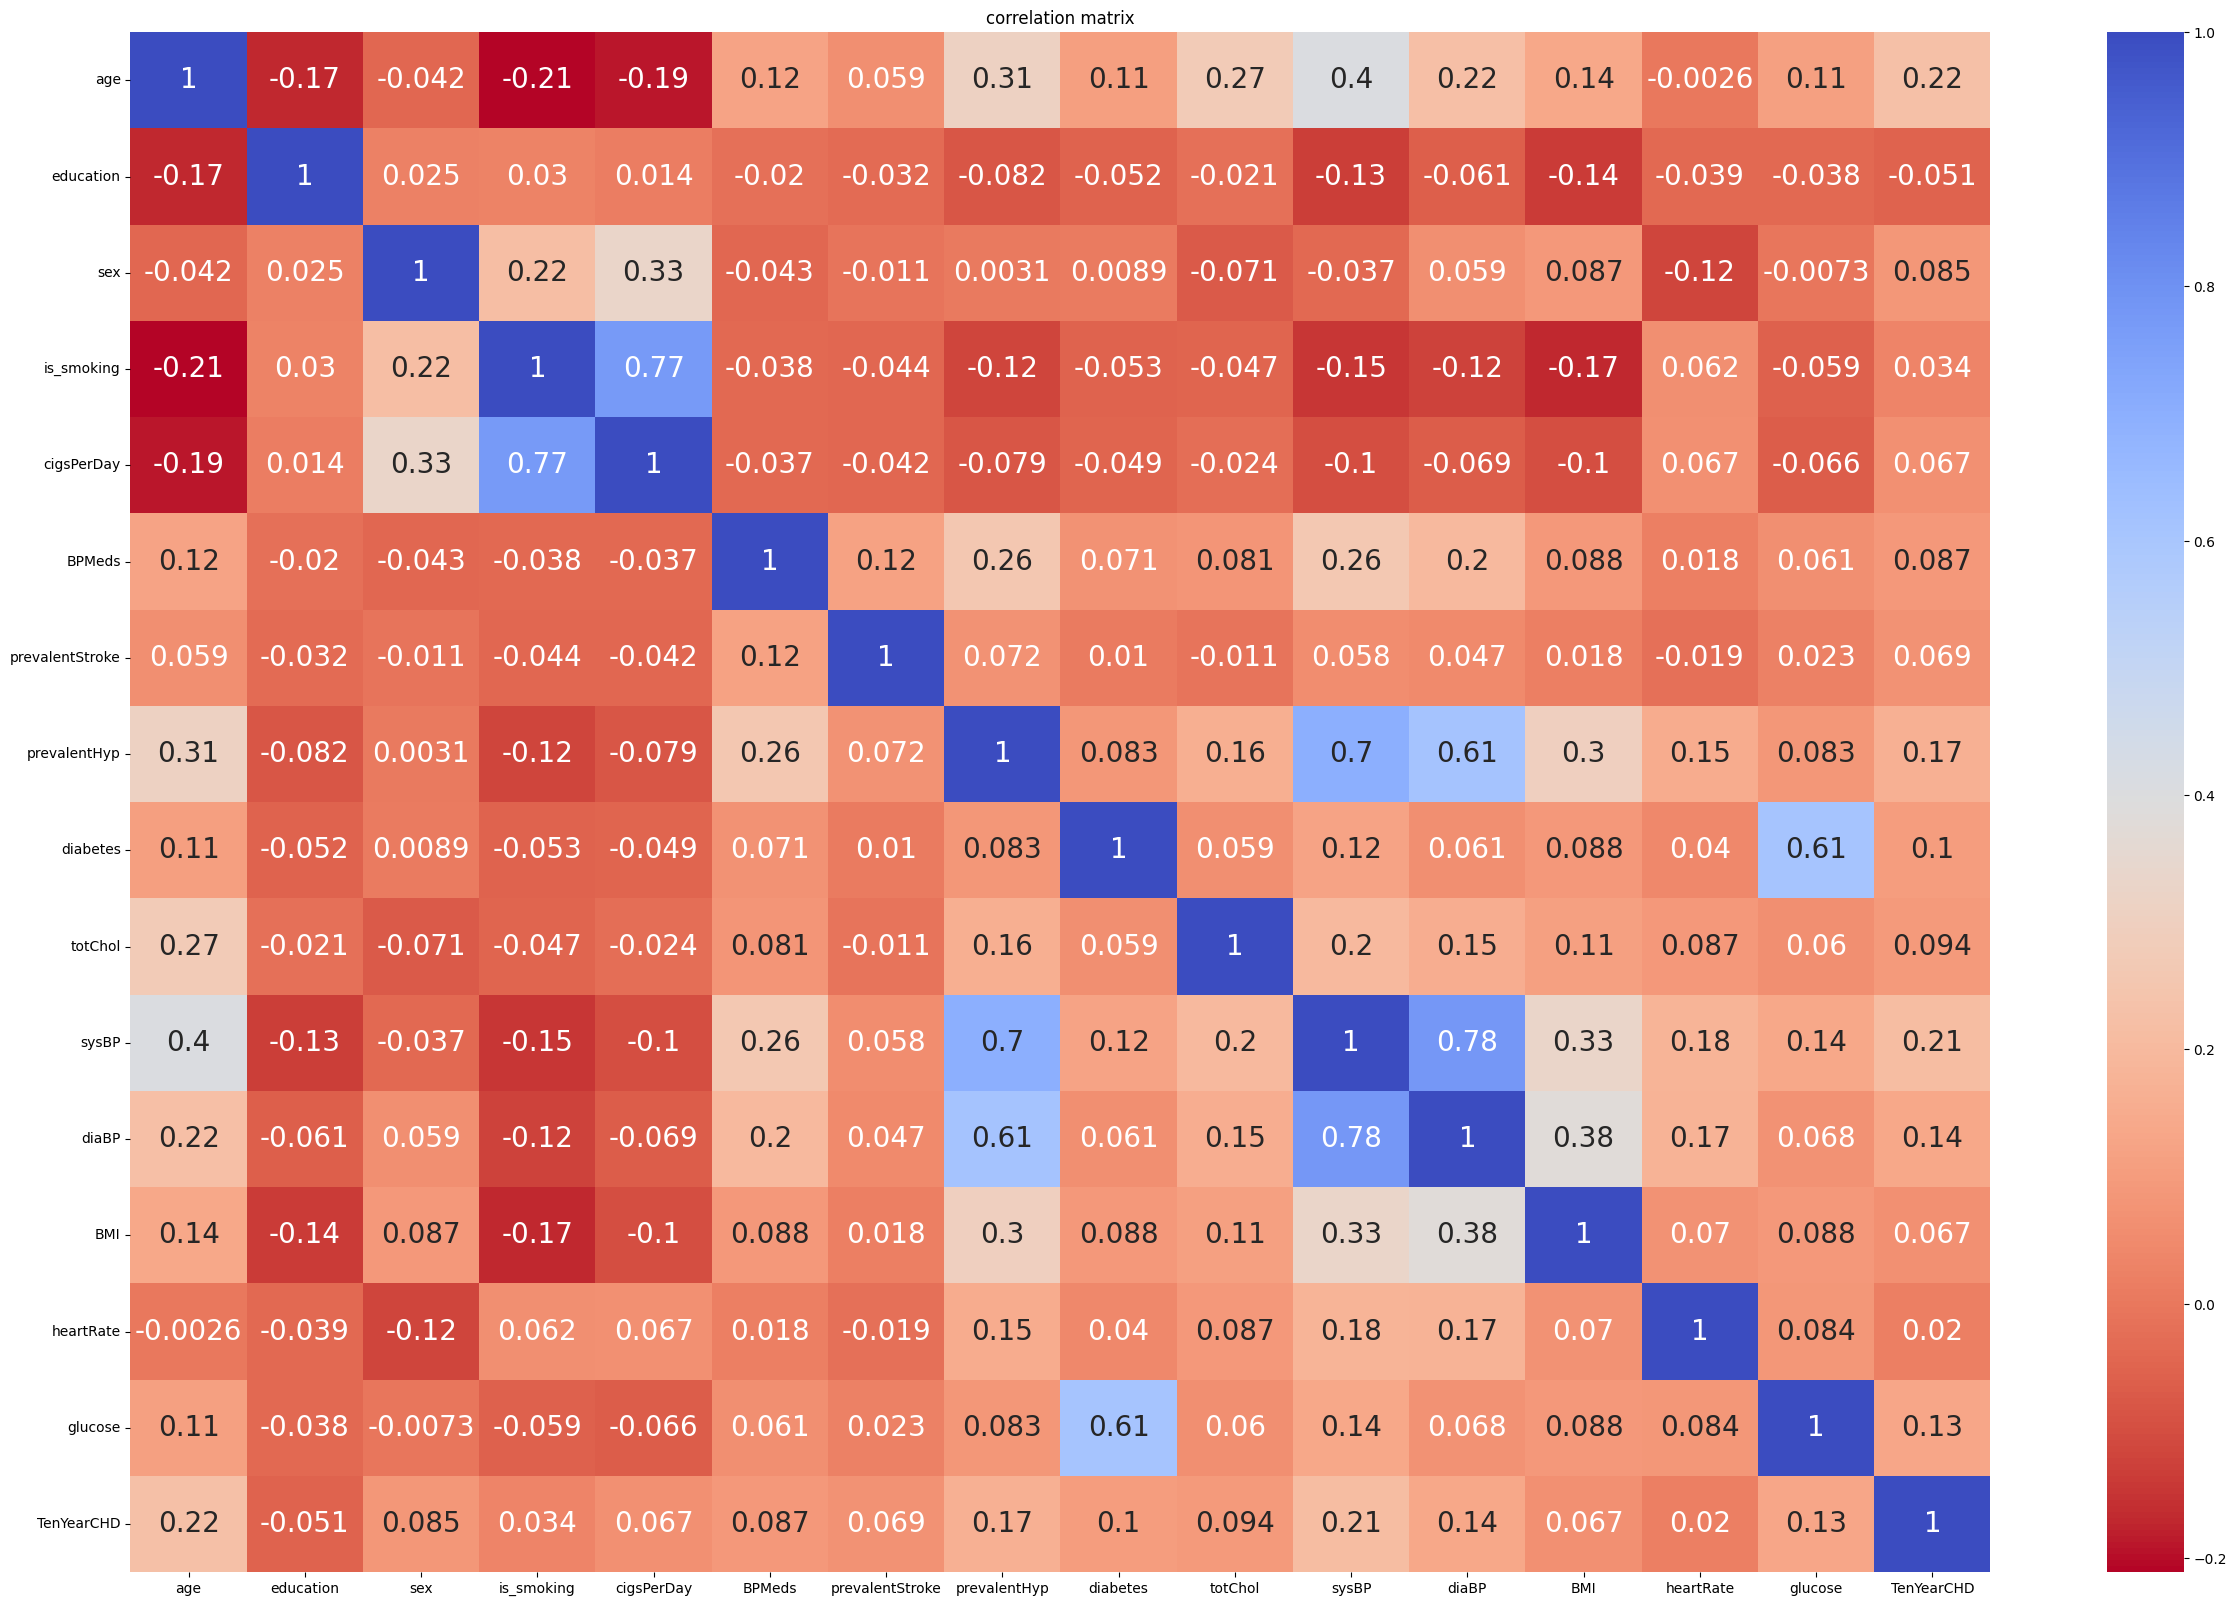

In [12]:
f,ax = plt.subplots(figsize=(30,20))
corr = df.corr()    
sns.heatmap(corr, cmap='coolwarm_r', annot=True, annot_kws={'size':20}, ax=ax)
plt.title('correlation matrix')
plt.show()

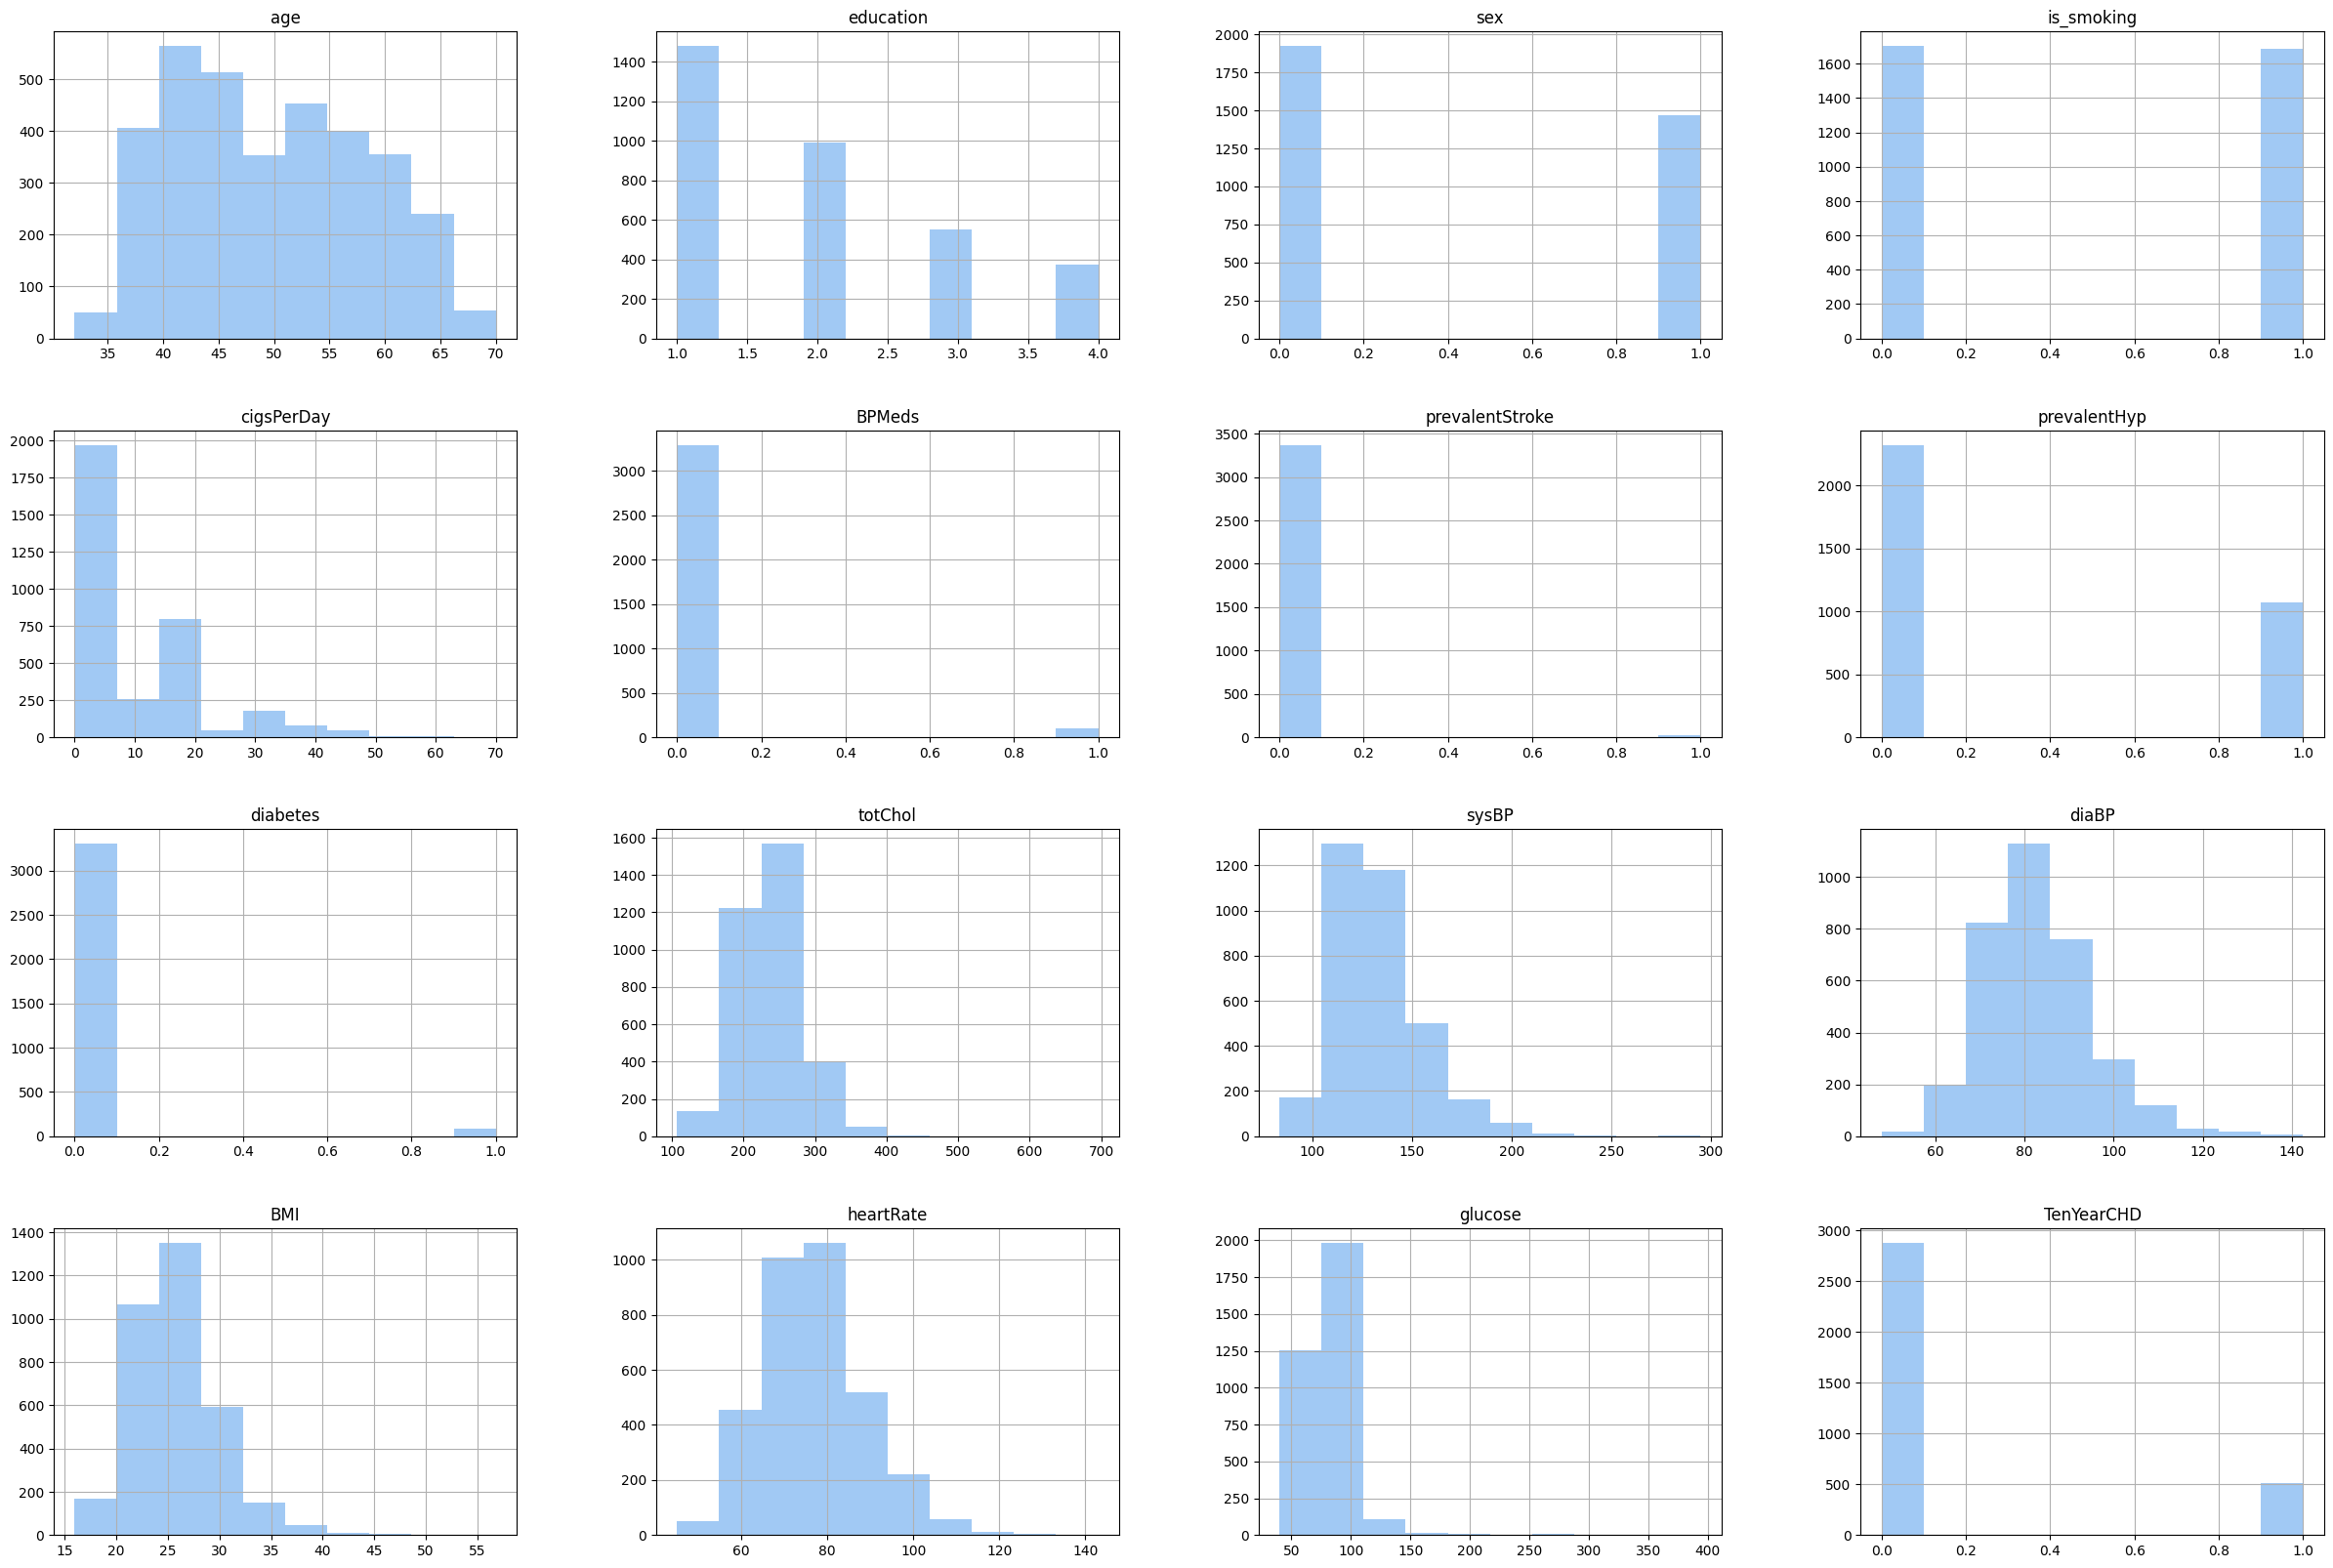

In [13]:
fig = plt.figure(figsize = (30,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

### TenYearCHD

`TenYearCHD`: 10 year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”)

From the counts of each class in `TenYearCHD`, we can tell that this datasets is imbalanced, with the number of instances in the class `0` (Negative with cardiovascular disease) significantly higher than the other. This imbalance can lead to biased model performance, as machine learning models often prioritize accuracy on the majority class while misclassifying instances of the minority class.

In [14]:
df["TenYearCHD"].value_counts()

TenYearCHD
0    2879
1     511
Name: count, dtype: int64

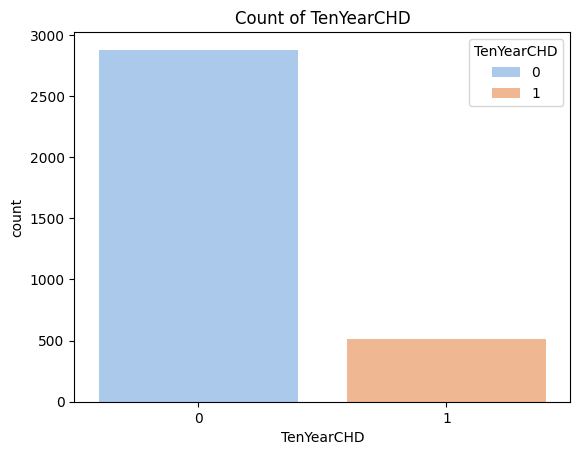

In [15]:
sns.countplot(x='TenYearCHD', data=df, hue='TenYearCHD')
plt.title('Count of TenYearCHD')
plt.show()

### Age

The dataset contains samples ranging from ages 27 to 70 years. 
- From the chart below, we can observe that people are affected by cardiovascular disease starting from the age of 35.
- Females are more likely to be affected by coronary heart disease CHD compared to males.

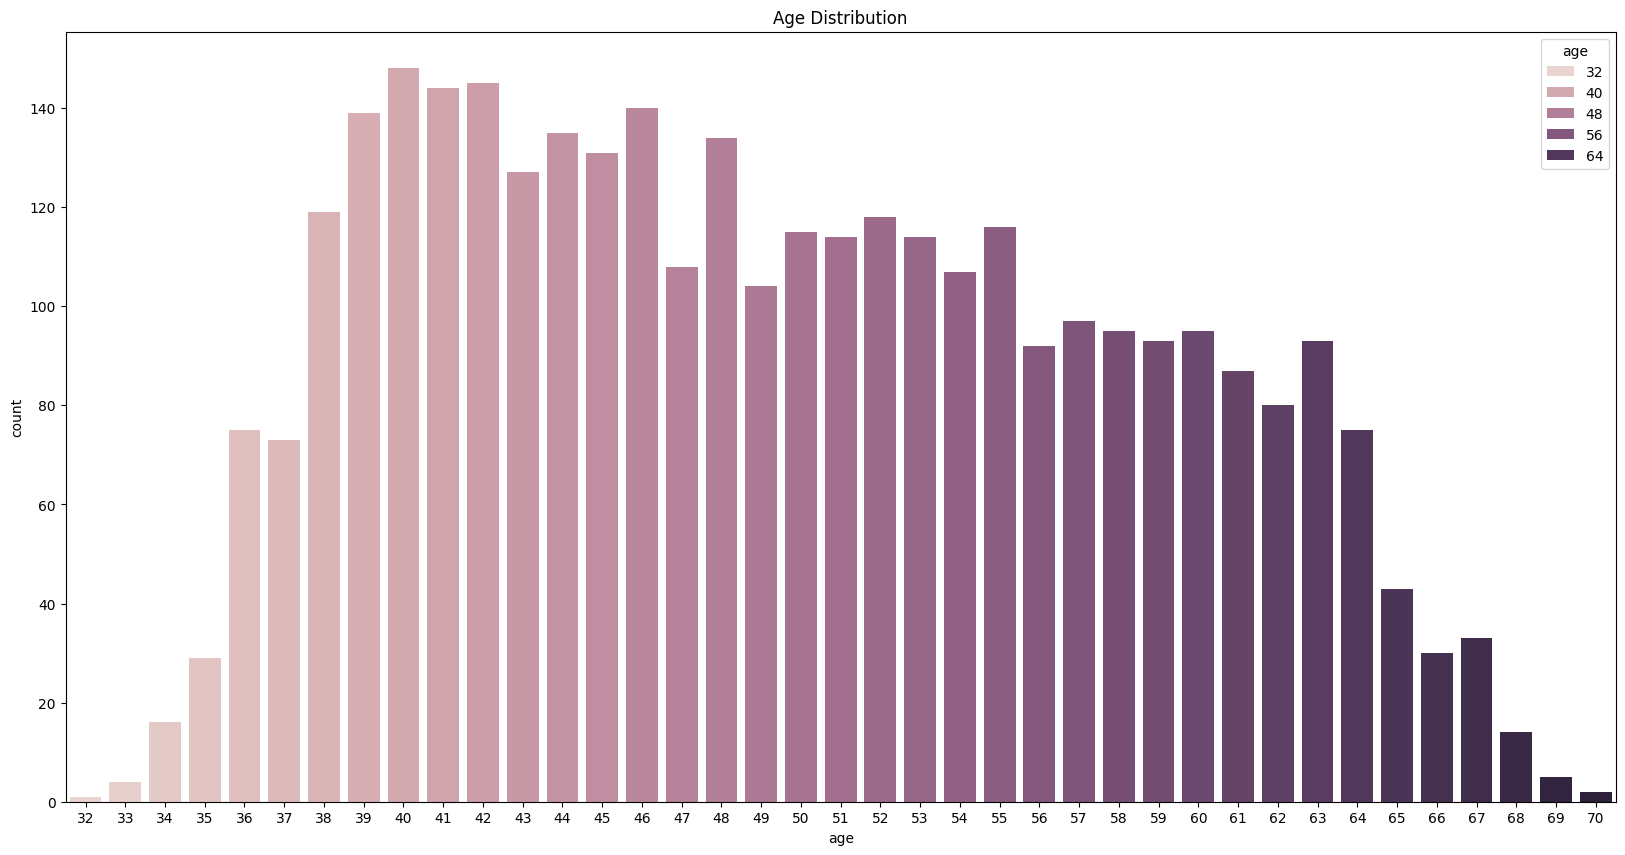

In [16]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(x='age', data=df, hue='age')
plt.title('Age Distribution')
plt.show()

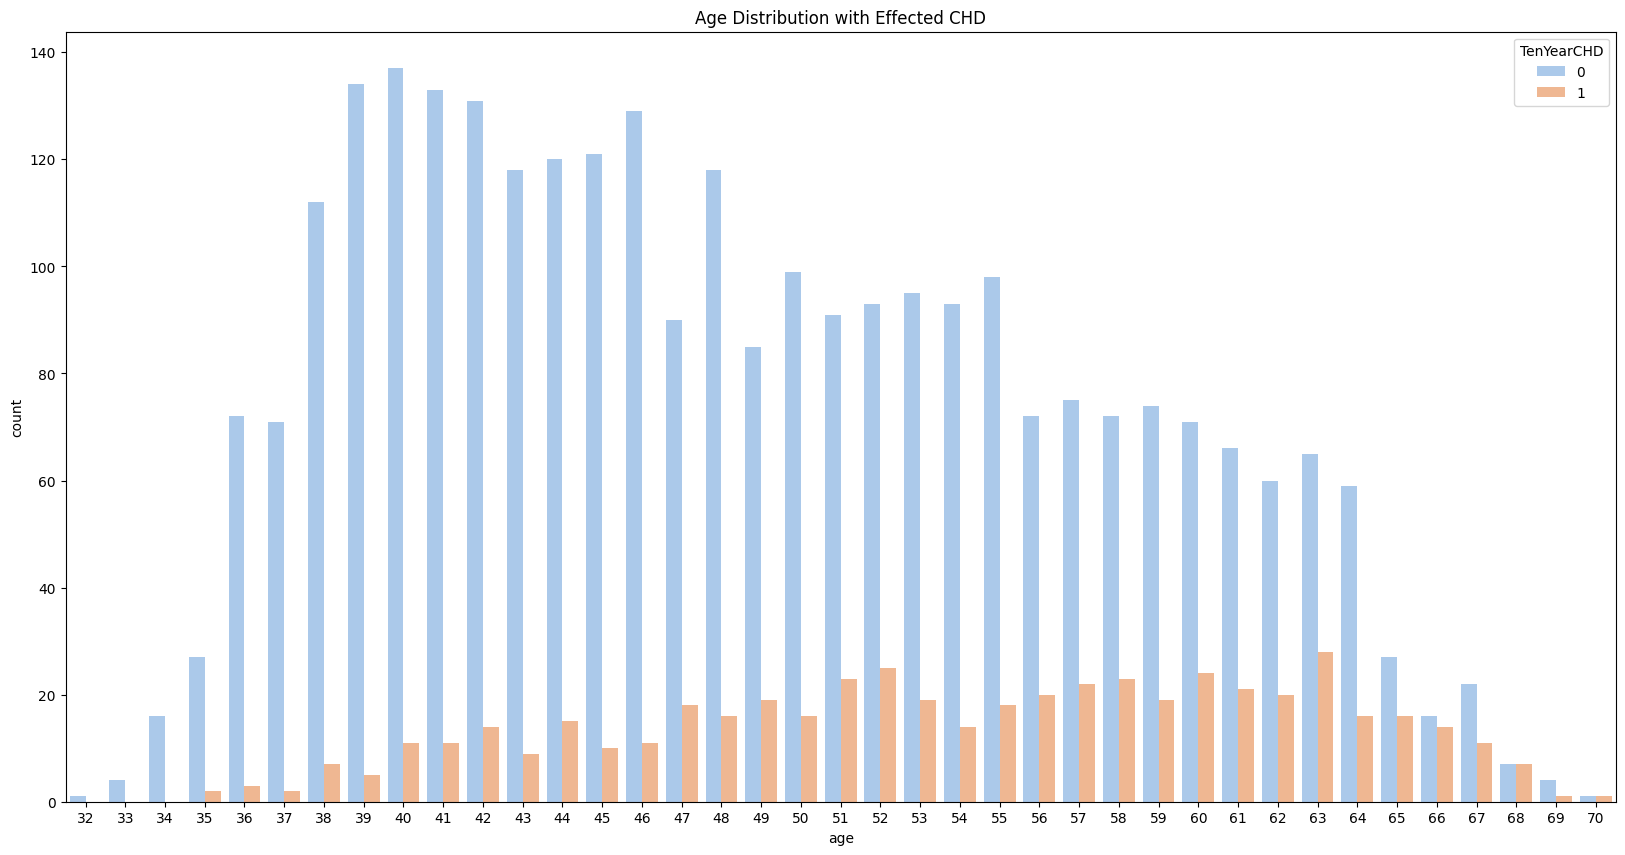

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
sns.countplot(df, x='age', hue='TenYearCHD')
plt.title('Age Distribution with Effected CHD')
plt.show()

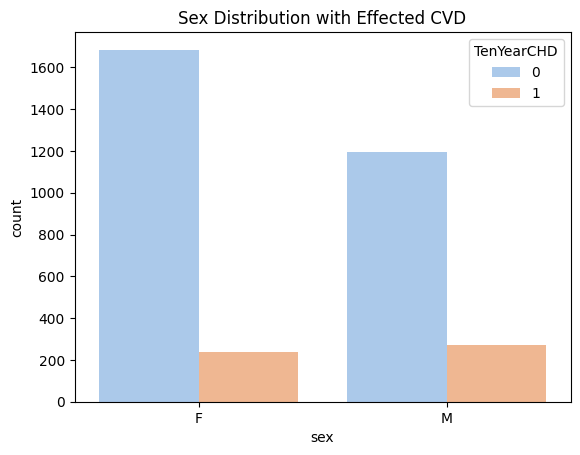

In [18]:
sns.countplot(df_original, x='sex', hue='TenYearCHD')
plt.title('Sex Distribution with Effected CVD')
plt.show()

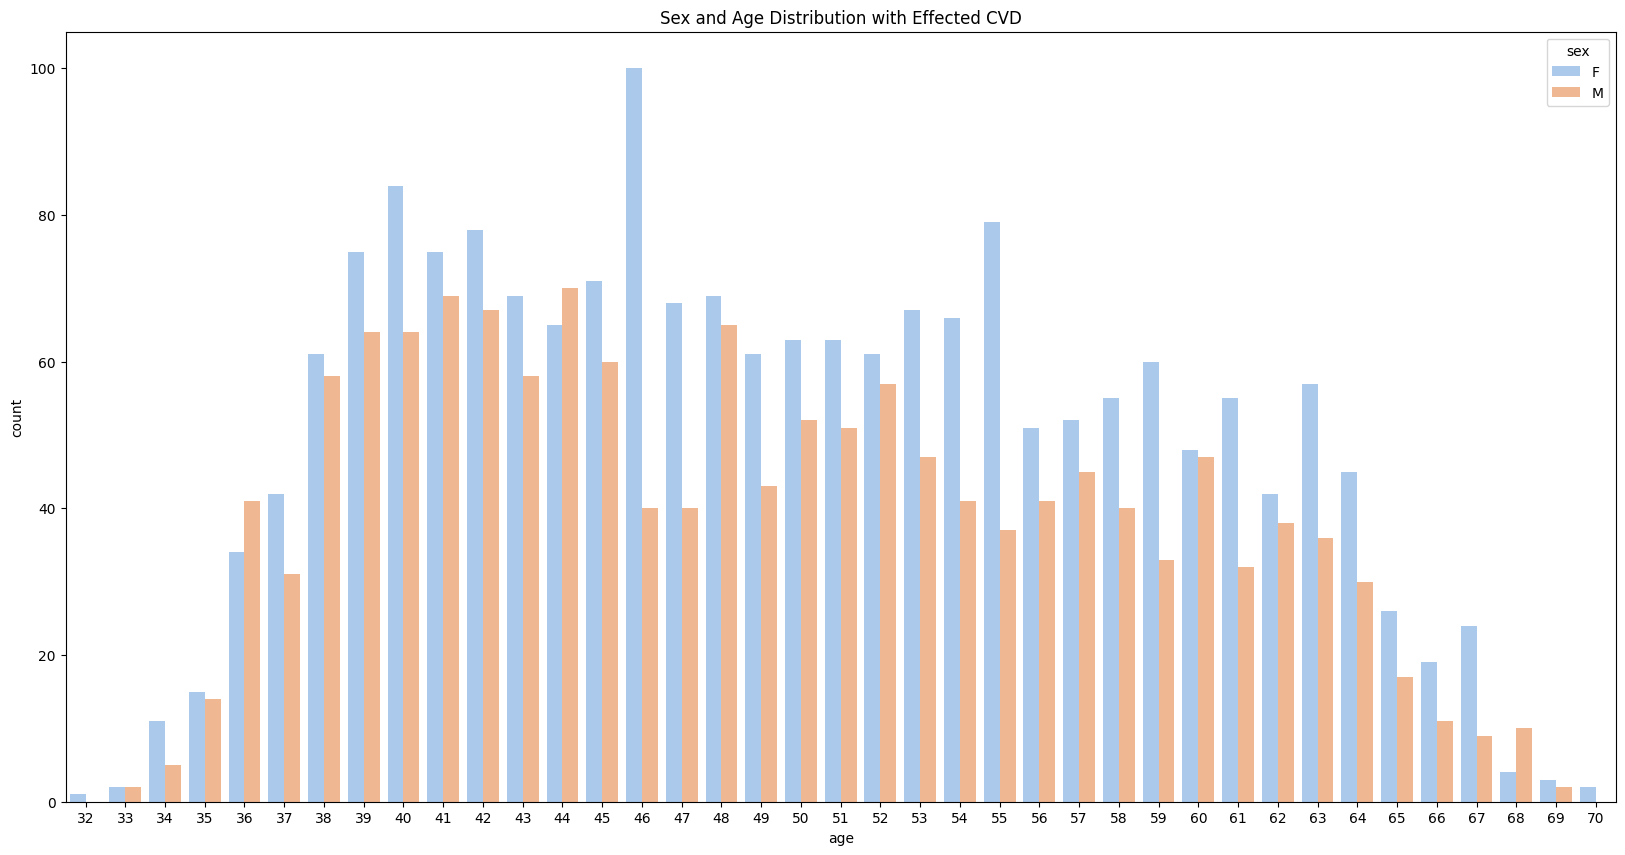

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
df1 = df_original.groupby(['age', 'sex'])['TenYearCHD'].count().reset_index()
df1 = df1.rename(columns={'TenYearCHD': 'count'})

sns.barplot(df1, x='age', y='count', hue='sex')
plt.title('Sex and Age Distribution with Effected CVD')
plt.show()

## Classification 

### Preparation

In [21]:
X = df.copy(deep=True)
y = X['TenYearCHD']
X.drop('TenYearCHD', axis=1, inplace=True)

Using the Synthetic Minority Over-sampling Techinique (SMOTE) to balance the class distribution by creating synthetic minority class samples. The SMOTE algorithm selects pairs of similar instances from the minority class and creates new instances along the line segments connecting these pairs.

In [22]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
y_sm=pd.DataFrame(y_sm)
y_sm.value_counts()

TenYearCHD
0             2879
1             2879
Name: count, dtype: int64

### Data Splitting

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm,
                                                    test_size = 0.2, #20% testing
                                                    random_state=random_state) #split the data

In [25]:
print('X_train.shape', X_train.shape)
print('X_test.shape', X_test.shape)

X_train.shape (4606, 15)
X_test.shape (1152, 15)


In [30]:
print('TenYearCHD in y_train distribution\n')
print(y_train.value_counts())
print('\n')
print('TenYearCHD in y_test distribution\n')
print(y_test.value_counts())

TenYearCHD in y_train distribution

TenYearCHD
1             2312
0             2294
Name: count, dtype: int64


TenYearCHD in y_test distribution

TenYearCHD
0             585
1             567
Name: count, dtype: int64


In [32]:
from sklearn.preprocessing import normalize
X_train_nm = normalize(X_train)
X_test_nm = normalize(X_test)
x_nm = normalize(X_sm)

In [33]:
y_train_transform = y_train.replace([0, 1], ['no', 'yes'])
features = list(df.columns)

In [34]:
f1 = {}

## LogisticRegression

In [46]:
log_reg = LogisticRegression(solver="liblinear")

param_grid = {"penalty" : ["l1", "l2"],
            "C" : np.arange(60,80,2)}

log = GridSearchCV(log_reg, param_grid, cv=3)
log.fit(X_train, y_train)

print('\nBest parameters:', log.best_params_)
log_model = log.best_estimator_
print(log_model)
log_y_pred = log_model.predict(X_test)

report_log = classification_report(y_test, log_y_pred.astype(int), output_dict=True)
f1['log'] = report_log['weighted avg']['f1-score']

print("Logistic Regression f1-score: {:.4f}%".format(f1['log']))
print('-'*55)
print(classification_report(y_test, log_y_pred.astype(int)))
print('-'*55)


Best parameters: {'C': 74, 'penalty': 'l2'}
LogisticRegression(C=74, solver='liblinear')
Logistic Regression f1-score: 0.6909%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.71      0.70       585
           1       0.69      0.68      0.68       567

    accuracy                           0.69      1152
   macro avg       0.69      0.69      0.69      1152
weighted avg       0.69      0.69      0.69      1152

-------------------------------------------------------


## Random Forest Classification

In [36]:
#takes long time to train
param_grid = {'n_estimators' : [10, 100, 1000],
                  'max_depth' : [3, 5, 7, 9, 12, 15]
             }
rf = GridSearchCV(RandomForestClassifier(random_state=random_state), param_grid)
rf.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=123),
             param_grid={'max_depth': [3, 5, 7, 9, 12, 15],
                         'n_estimators': [10, 100, 1000]})

In [37]:
print('\nBest parameters:', rf.best_params_)
rf_model = rf.best_estimator_
print(rf_model)
rf_y_pred = rf_model.predict(X_test)
report_log = classification_report(y_test, rf_y_pred.astype(int), output_dict=True)
f1['rf'] = report_log['weighted avg']['f1-score']

print("RandomForest f1-score: {:.4f}%".format(f1['rf']))
print(classification_report(y_test, rf_y_pred.astype(int)))
print('-'*55)


Best parameters: {'max_depth': 15, 'n_estimators': 1000}
RandomForestClassifier(max_depth=15, n_estimators=1000, random_state=123)
RandomForest f1-score: 0.9045%
              precision    recall  f1-score   support

           0       0.89      0.92      0.91       585
           1       0.92      0.89      0.90       567

    accuracy                           0.90      1152
   macro avg       0.91      0.90      0.90      1152
weighted avg       0.90      0.90      0.90      1152

-------------------------------------------------------


## DecisionTreeClassifier

In [38]:
param_grid = {'criterion': ['entropy', 'gini'],
             'splitter' : ['best', 'random']}
dt = GridSearchCV(DecisionTreeClassifier(random_state=random_state), param_grid)
dt.fit(X_train, y_train)

print('\nBest parameters:', dt.best_params_)
dt_model = dt.best_estimator_
print(dt_model)
dt_y_pred = dt_model.predict(X_test)
report_log = classification_report(y_test, dt_y_pred.astype(int), output_dict=True)
f1['dt'] = report_log['weighted avg']['f1-score']

print("DT f1-score: {:.4f}%".format(f1['dt']))
print('-'*55)
print(classification_report(y_test, dt_y_pred.astype(int)))
print('-'*55)
print()


Best parameters: {'criterion': 'entropy', 'splitter': 'best'}
DecisionTreeClassifier(criterion='entropy', random_state=123)
DT f1-score: 0.8099%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.80      0.81       585
           1       0.80      0.82      0.81       567

    accuracy                           0.81      1152
   macro avg       0.81      0.81      0.81      1152
weighted avg       0.81      0.81      0.81      1152

-------------------------------------------------------



In [39]:
important_feature = []
for idx in range(len(dt_model.feature_importances_)):
    important_feature.append({'feature': features[idx],
                              'importance': dt_model.feature_importances_[idx]})
sort_df = pd.DataFrame(sorted(important_feature, key=lambda x: x['importance'], reverse=True))
sort_df

,feature,importance
0,education,0.138279
1,sysBP,0.121742
2,age,0.121203
3,cigsPerDay,0.095092
4,heartRate,0.089748
5,glucose,0.086866
6,totChol,0.084253
7,BMI,0.082938
8,is_smoking,0.069185
9,diaBP,0.056228


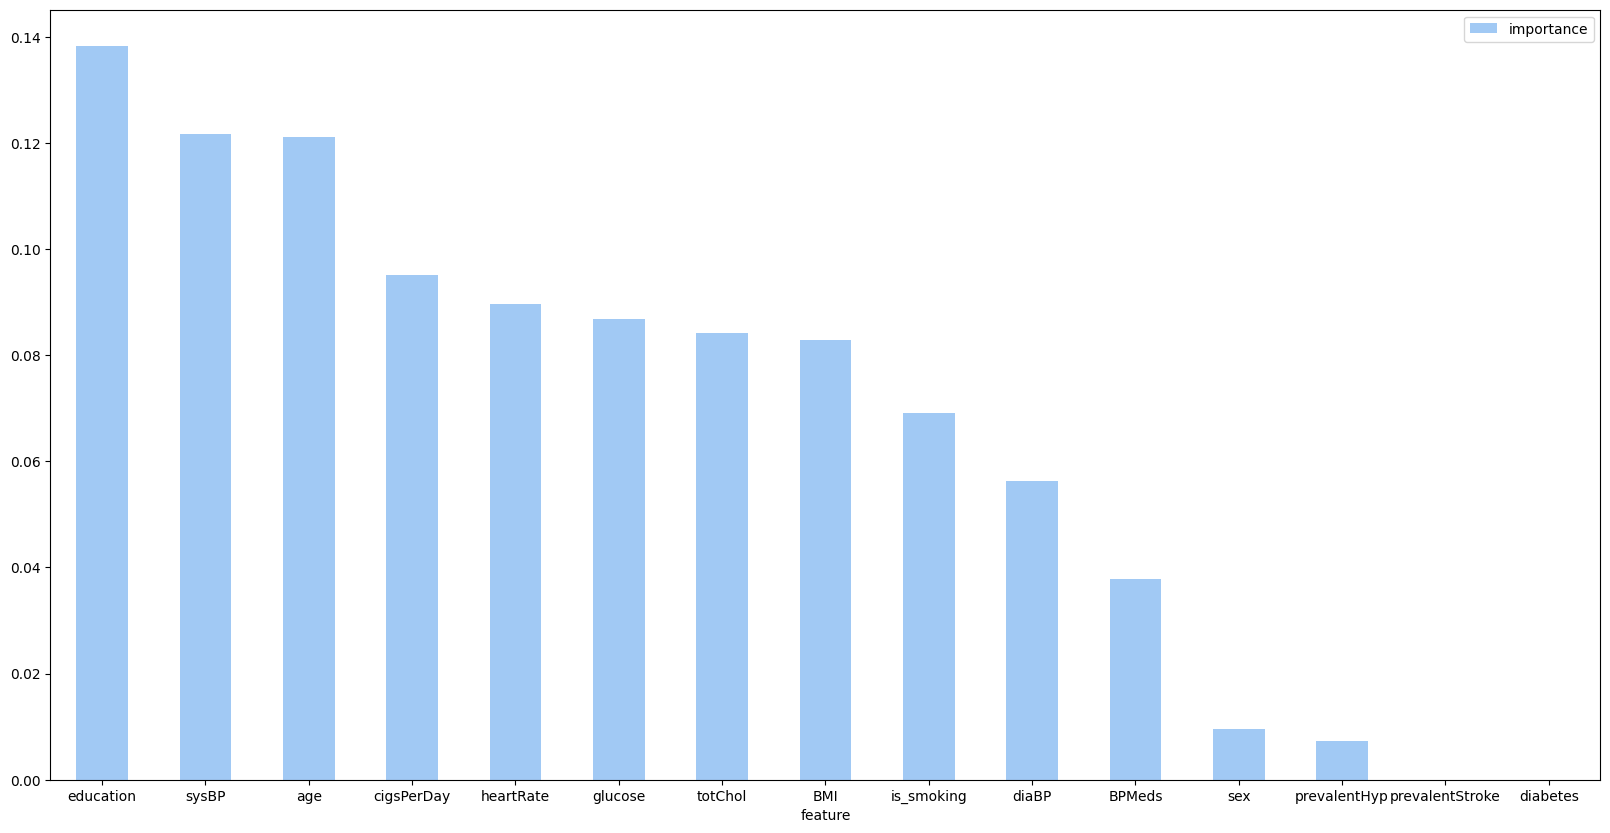

In [40]:
df = pd.DataFrame(important_feature)
df.sort_values(by='importance', ascending=False, inplace=True)
df.plot.bar(x='feature', y='importance', rot=0, figsize=(20,10))
plt.show()

## KNeighborsClassifier

In [41]:
param_grid = {'n_neighbors': list(range(1, 20))}
knn = GridSearchCV(KNeighborsClassifier(), param_grid)
knn.fit(X_train, y_train)

print('\nBest parameters:', knn.best_params_)
knn_model = knn.best_estimator_
print(knn_model)
knn_y_pred = knn_model.predict(X_test)

report_log = classification_report(y_test, knn_y_pred.astype(int), output_dict=True)
f1['knn'] = report_log['weighted avg']['f1-score']

print("KNN f1-score: {:.4f}%".format(f1['knn']))
print('-'*55)
print(classification_report(y_test, knn_y_pred.astype(int)))
print('-'*55)


Best parameters: {'n_neighbors': 2}
KNeighborsClassifier(n_neighbors=2)
KNN f1-score: 0.8789%
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.81      0.87       585
           1       0.83      0.95      0.89       567

    accuracy                           0.88      1152
   macro avg       0.89      0.88      0.88      1152
weighted avg       0.89      0.88      0.88      1152

-------------------------------------------------------


## Confusion Matrix

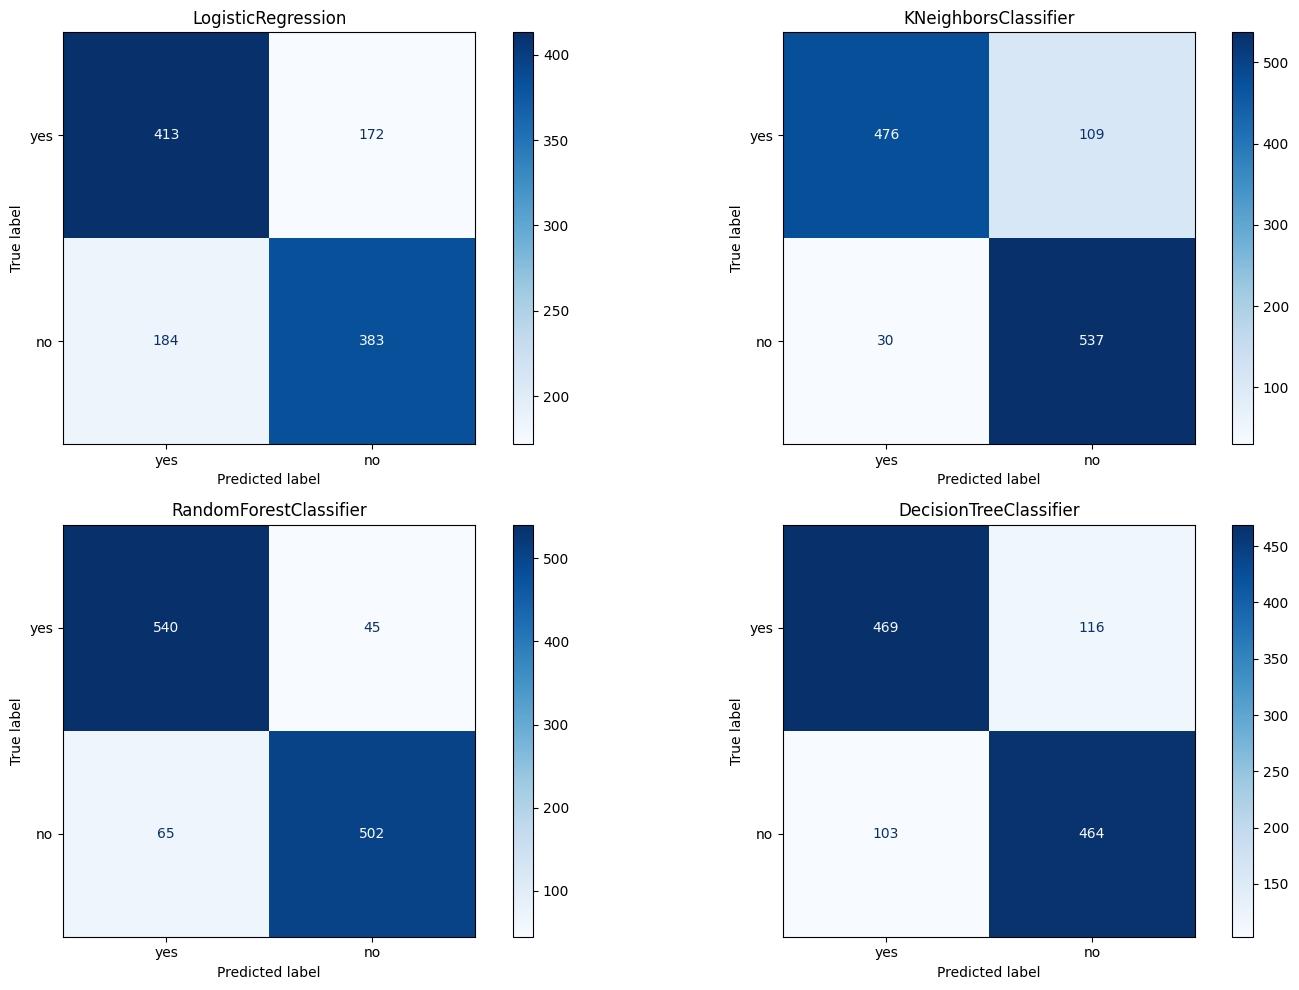

In [42]:
from sklearn.metrics import ConfusionMatrixDisplay
classifiers = [log_model, knn_model, rf_model, dt_model]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))

for cls, ax in zip(classifiers, axes.flatten()):
    ConfusionMatrixDisplay.from_estimator(cls, 
                          X_test, 
                          y_test, 
                          ax=ax, 
                          cmap='Blues',
                          display_labels=y_train_transform['TenYearCHD'].unique())
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()  
plt.show()

## McNemar's test

In [43]:
from scipy.stats import chi2

def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    df = 1
    pval = chi2.sf(stat,1)
    return stat, pval

In [47]:
# Calculate whether each test prediction is correct
log_yn = np.array([int(p==t) for p,t in zip(log_y_pred, y_test)])
dt_yn = np.array([int(p==t) for p,t in zip(dt_y_pred, y_test)])
knn_yn = np.array([int(p==t) for p,t in zip(knn_y_pred, y_test)])
rf_yn = np.array([int(p==t) for p,t in zip(rf_y_pred, y_test)])

# There's very little difference in this data set
log_p = mcnemar(log_yn, dt_yn)[1]
knn_p = mcnemar(knn_yn, dt_yn)[1]
rf_p = mcnemar(rf_yn, dt_yn)[1]

p_list = [{'model':'Log_Re',  'pvalue': log_p},
         {'model': 'KNN', 'pvalue': knn_p},
         {'model':'Random Forest', 'pvalue': rf_p}]
# We cannot reject H0. Accuracy is different but not reliably so.
# Therefore, we can select either classifier, e.g.,
# decision tree for interpretability.

# interpret the p-value
alpha = 0.05
for p in p_list:
    if p['pvalue'] > alpha:
        print('P-values between {} and Decision tree is: {} (fail to reject H0)'.format(p['model'], p['pvalue']))
    else:
        print('P-values between {} and Decision tree is: {} (reject H0)'.format(p['model'], p['pvalue']))

P-values between Log_Re and Decision tree is: 0.0 (reject H0)
P-values between KNN and Decision tree is: 0.0 (reject H0)
P-values between Random Forest and Decision tree is: 0.0 (reject H0)


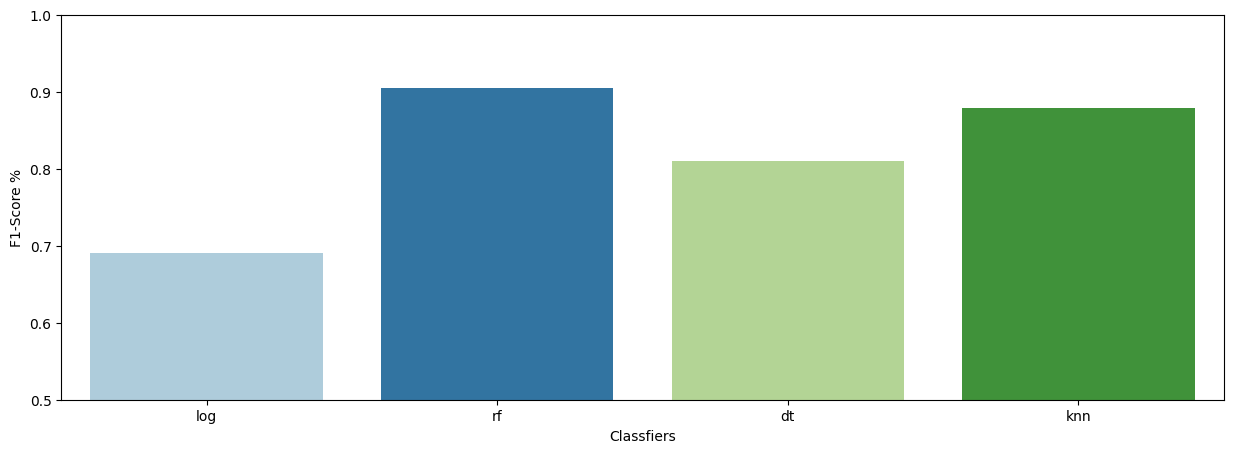

In [55]:
plt.figure(figsize=(15,5))
plt.ylim([0.5, 1])
plt.ylabel("F1-Score %")
plt.xlabel("Classfiers")
sns.barplot(x=list(f1.keys()), y=list(f1.values()), palette='Paired')
plt.show()

In [56]:
f1

{'log': 0.6908883361835736,
 'rf': 0.9044591467646305,
 'dt': 0.8099051445882272,
 'knn': 0.878900904443385}